# EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load Data
cars = pd.read_csv("USA_cars_datasets.csv")

In [4]:
# View dataset info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [5]:
# Check for NAs - there should be none based on the info above
cars.isna().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [6]:
# Check for duplicate rows
duplicates = cars.duplicated()
cars[duplicates]

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition


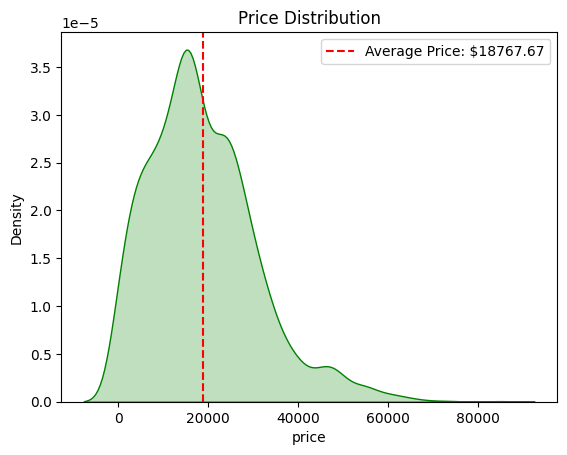

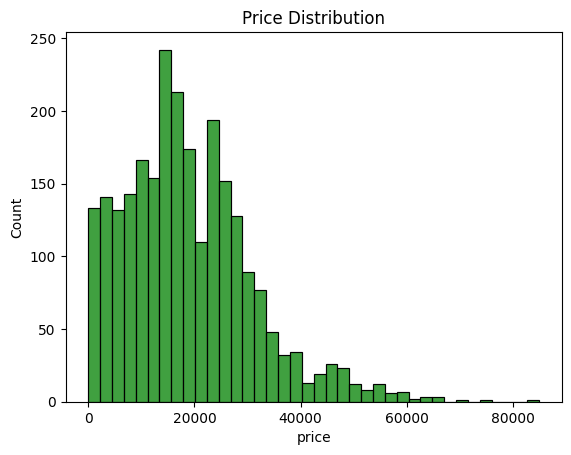

In [7]:
# Calculate the average price
ave_price = cars['price'].mean().round(2)

# Visualize the target variable: price
sns.kdeplot(cars['price'], fill=True, color='green')
plt.axvline(ave_price, label=f"Average Price: ${ave_price}", color='red', linestyle='--')
plt.legend()
plt.title("Price Distribution")
plt.show()

# Visualize as a histogram
sns.histplot(cars['price'], color='green')
plt.title("Price Distribution")
plt.show()

<Axes: ylabel='mileage'>

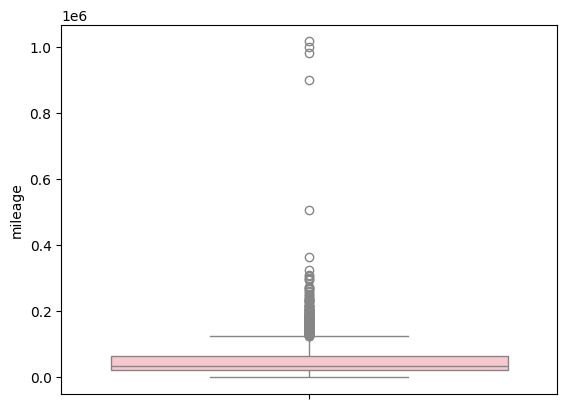

In [8]:
# Boxplot of car mileage
sns.boxplot(cars['mileage'], fill=True, color='pink')

There are some very significant outliers in car mileage. It may be best to remove these outliers to manage the distribution.

In [9]:
# View the cars with the top miles
max_mileage = cars['mileage'].max()
print("Max Mileage:", max_mileage)

car_mileage = cars.sort_values(by='mileage', ascending=False)
car_mileage.head(10)

Max Mileage: 1017936


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
528,528,1025,peterbilt,truck,2010,salvage insurance,1017936,color:,1xp7d49x0ad793710,167529842,georgia,usa,17 hours left
1827,1827,3200,ford,door,2013,clean vehicle,999999,silver,1fadp3k21dl266148,167727773,south carolina,usa,21 hours left
516,516,0,peterbilt,truck,2009,salvage insurance,982486,blue,1xp7d49x09d784257,167529788,florida,usa,17 hours left
490,490,475,peterbilt,truck,2012,salvage insurance,902041,gold,1xp4d49x9cd123630,167529786,florida,usa,17 hours left
531,531,2000,chevrolet,pickup,2003,clean vehicle,507985,red,1gcgc24u53z128586,167781223,wisconsin,usa,21 hours left
1974,1974,2825,ford,door,2014,salvage insurance,363810,white,1fmjk1g53eef23881,167555421,montana,usa,17 hours left
311,311,7320,chevrolet,pickup,2008,clean vehicle,325611,silver,1gchk23648f125262,167660581,florida,usa,22 hours left
197,197,15700,ford,cab,2011,clean vehicle,309564,white,1fduf5gt8bea80212,167756640,south carolina,usa,21 hours left
367,367,2725,chevrolet,door,2004,salvage insurance,308451,black,1gcjc33204f177273,167650940,south carolina,usa,2 days left
395,395,25,ford,door,1998,salvage insurance,300021,brown,1ftzx0766wka18481,167611660,arkansas,usa,17 hours left


There are 4 significant mileage outliers, and there is a less significant fifth outlier, that are strongly skewing the distribution. It may be best to remove these values.

In [10]:
# Remove the mileage outliers
mileage_max = 500000
cars2 = cars[cars['mileage'] <= mileage_max]

<Axes: ylabel='mileage'>

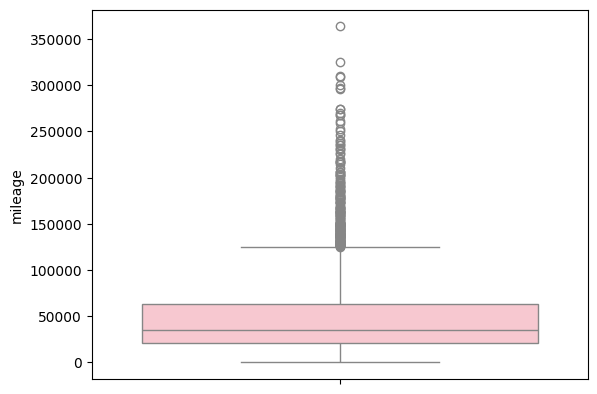

In [11]:
# Recreate the boxplot based on mileage
sns.boxplot(cars2['mileage'], fill=True, color='pink')

There are still many outliers, but the distribution is far more manageable.

<Axes: ylabel='mileage'>

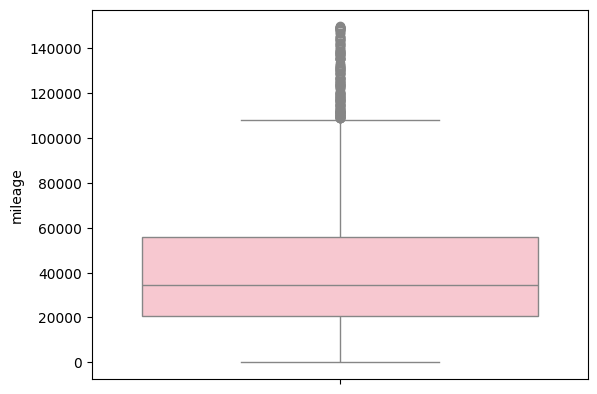

In [12]:
# Create a data set that is even more condensed based on mileage
mileage_max2 = 150000
cars3 = cars[cars['mileage'] <= mileage_max2]

# Recreate the boxplot with an even smaller mileage cutoff
sns.boxplot(cars3['mileage'], fill=True, color='pink')

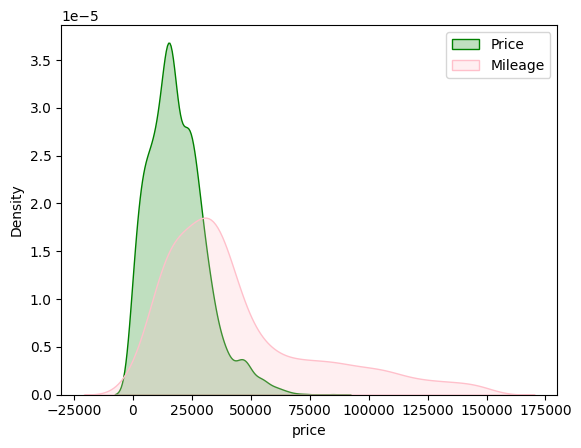

In [13]:
# Plot price and mileage
sns.kdeplot(cars['price'], label='Price', fill=True, color='green')
sns.kdeplot(cars3['mileage'], label='Mileage', fill=True, color='pink')
plt.legend()
plt.show()

In [14]:
cars.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [15]:
# Look at what countries are represented in the data
cars['country'].value_counts()

country
usa       2492
canada       7
Name: count, dtype: int64

In [16]:
# Count the number of states in all
n_states = cars['state'].nunique()
print(f"There are {n_states} total states represented in the data.")

# Look at the counts of represented states
cars['state'].value_counts()

There are 44 total states represented in the data.


state
pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
south carolina     64
new york           58
georgia            51
missouri           46
arizona            33
ohio               31
massachusetts      27
oregon             27
tennessee          26
connecticut        25
mississippi        24
colorado           21
west virginia      21
alabama            17
washington         14
indiana            14
arkansas           12
louisiana          11
utah               10
kentucky            9
ontario             7
kansas              4
maryland            4
nebraska            4
new mexico          4
new hampshire       4
rhode island        2
idaho               2
vermont             2
wyoming             1
montana             1
Name: count, dtype: int64

The majority of the cars in this data are from the United States, and there are only 7 entries from another country, which happens to be Canada. There is representation from a variety of states, although this representation is unequal.

In [17]:
# Subset the data to US States
cars4 = cars[cars['country'] == ' usa']

# Make a new df for state counts
cars_state = cars4.groupby('state').size().reset_index()
cars_state.columns = ['state', 'count']

'''
# Visualize the state distribution on a map
map = px.choropleth(cars_state, locations='state', locationmode='USA-states', color='count', scope='usa')
map.show()
'''

"\n# Visualize the state distribution on a map\nmap = px.choropleth(cars_state, locations='state', locationmode='USA-states', color='count', scope='usa')\nmap.show()\n"

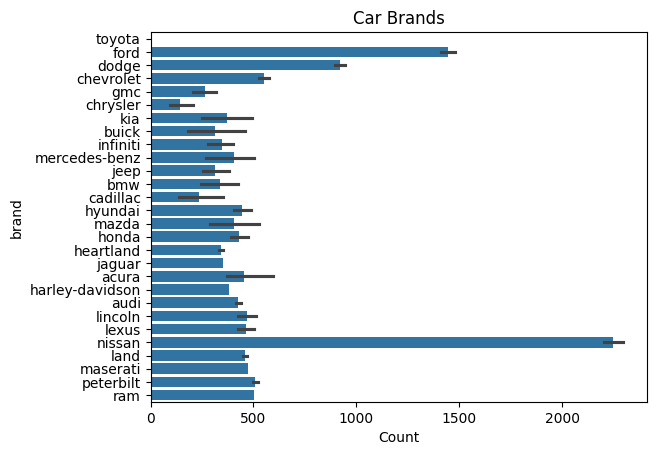

In [18]:
# Display the variety of represented car brands
sns.barplot(cars['brand'])
plt.title('Car Brands')
plt.xlabel("Count")
plt.show()

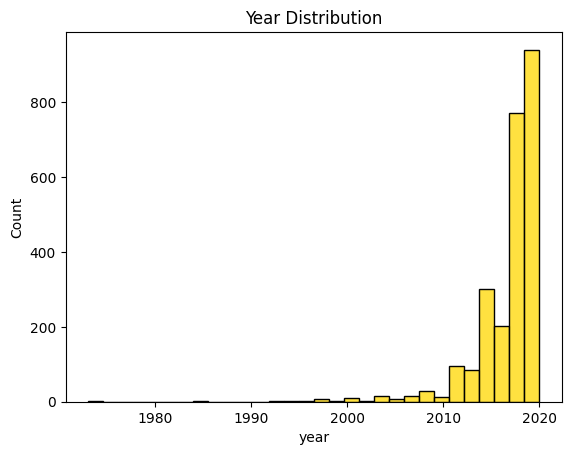

In [19]:
# Year Distribution
#cars['year'].value_counts()

sns.histplot(cars['year'], bins=30, color='gold')
plt.title("Year Distribution")
plt.show()

Most of the cars are concentrated between 2010 and 2020. It may be more effective to remove the older cars from the data.

In [20]:
# Analyze the older cars
cars5 = cars.sort_values(by='year')
cars5.head(20)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
32,32,29800,chevrolet,camaro,1973,clean vehicle,46226,red,1q87t3n166389,167763370,pennsylvania,usa,22 hours left
405,405,25,ford,door,1984,salvage insurance,41577,white,2ftcf15y9eca14589,167611661,arkansas,usa,17 hours left
545,545,0,gmc,door,1993,salvage insurance,0,light blue,1gkfk16k5pj701631,167358601,colorado,usa,18 hours left
362,362,25,ford,pickup,1994,salvage insurance,206162,white,1ftdf15y2rnb12612,167361489,georgia,usa,2 days left
322,322,0,ford,chassis,1994,salvage insurance,0,green,1fdee14n7rha47894,167359174,california,usa,19 hours left
410,410,0,chevrolet,door,1995,salvage insurance,274706,green,2gcec19h8s1195266,167425634,arizona,usa,2 days left
496,496,0,ford,pickup,1996,salvage insurance,252588,red,1ftef15n0tlc14455,167357804,oklahoma,usa,17 hours left
330,330,0,ford,door,1996,salvage insurance,296860,green,1falp62w5th144314,167359712,california,usa,19 hours left
323,323,0,ford,door,1997,salvage insurance,203297,green,1fmdu35p7vub38059,167610731,minnesota,usa,17 hours left
370,370,0,ford,door,1997,salvage insurance,146912,green,1ftdf18w8vna61251,167362449,wisconsin,usa,2 days left


There are only 15 cars with a year before 200.

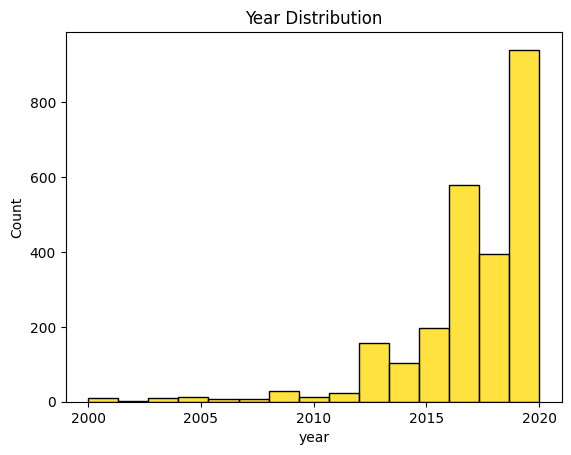

In [21]:
# Remove entries with cars older than 2000
cars5 = cars[cars['year'] >= 2000]

# Plot the new distribution
sns.histplot(cars5['year'], bins=15, color='gold')
plt.title("Year Distribution")
plt.xticks(ticks=[2000, 2005, 2010, 2015, 2020])
plt.show()

This data is still strongly skewed to the left. I will try removing all cars older than 2010.

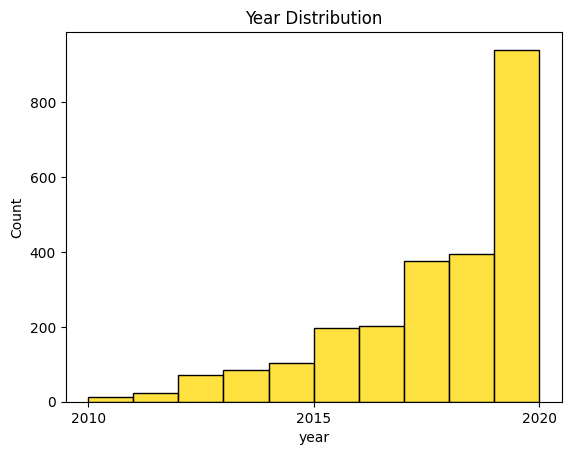

In [22]:
# Remove entries with cars older than 2010
cars6 = cars[cars['year'] >= 2010]

# Plot the new distribution
sns.histplot(cars6['year'], bins = 10, color='gold')
plt.title("Year Distribution")
plt.xticks(ticks=[2010, 2015, 2020])
plt.show()

In [24]:
# Analyze color
cars['color'].value_counts()

color
white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
billet silver metallic clearcoat             3
triple 

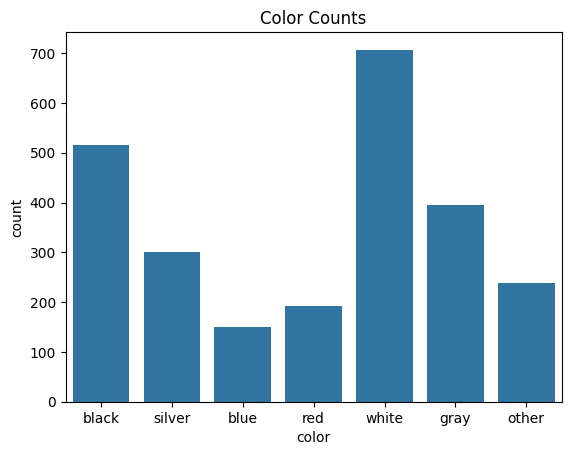

In [38]:
# Consolidate color variable
car_colors = ['white', 'black', 'gray', 'silver', 'red', 'blue']

# Turn miscellaneous car colors into 'other'
cars['color'] = cars['color'].apply(lambda x: x if x in car_colors else 'other')

# View counts of different colors
sns.countplot(cars, x='color')
plt.title('Color Counts')
plt.show()